In [44]:
from sklearn import datasets
import matplotlib.pyplot as plt
from engine import Value
from nn import MLP
%matplotlib inline

In [18]:
x, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [19]:
x = x[:1000]
y = y[:1000]

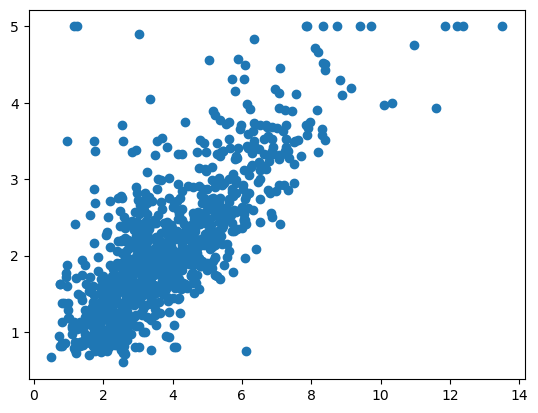

In [39]:
plt.scatter(x.T[0], y)

In [ ]:
model = MLP(8, [16, 4 , 1])
model

MLP of [Layer of [ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(4)]]

In [54]:
def loss():
    inputs = [list(map(Value, xrow)) for xrow in x]
    y_pred = list(map(model, inputs))

    loss = sum((y_pred_i - y_i)**2 for y_i, y_pred_i in zip(y, y_pred)) / len(y)

    return loss

In [55]:
# optimization
for k in range(100):
    
    # forward
    total_loss = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}")


step 0 loss 218568.83002583586
step 1 loss 542929.3077802078
step 2 loss 523559.7900505542
step 3 loss 486542.07465104054
step 4 loss 435414.3705029402
step 5 loss 374971.9991868334
step 6 loss 310514.4486681472
step 7 loss 247065.33011531873
step 8 loss 188727.46311288673
step 9 loss 138287.61807948968
step 10 loss 97111.88588770256
step 11 loss 65298.291523861866
step 12 loss 42000.40487696161
step 13 loss 25816.10604517429
step 14 loss 15148.082400032396
step 15 loss 8475.76155960347
step 16 loss 4517.103269430584
step 17 loss 2290.3088907945394
step 18 loss 1103.505747357803
step 19 loss 504.7057070867372
step 20 loss 218.96848349266438
step 21 loss 90.15707641187932
step 22 loss 35.36590656386327
step 23 loss 13.405102218699488
step 24 loss 5.123276363878948
step 25 loss 2.189360825017763
step 26 loss 1.2146883862988558
step 27 loss 0.9116173242301282
step 28 loss 0.82358842695589
step 29 loss 0.7997569211088765
step 30 loss 0.793757661646853
step 31 loss 0.7923569294320083
step 3

In [66]:
y = y[:50]
inputs = [list(map(Value, xrow)) for xrow in x][:50]
y_pred = list(map(model, inputs))[:50]

mae = sum(y_pred_i - y_i for y_i, y_pred_i in zip(y, y_pred)) / len(y)

print(f"MAE (Accuracy Measure): {mae.data}")

MAE (Accuracy Measure): 0.29556611999999965
